# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 1, 30)
print(x.shape)

(30,)


In [3]:
mu, sigma = 0, 0.07
sin = np.sin(x * np.pi * 2) ** 2
noise = np.random.normal(mu, sigma, 30)
y = sin + noise

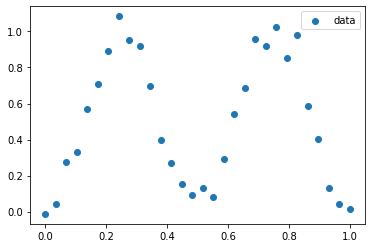

In [4]:
plt.scatter(x, y, label='data')
plt.legend(loc='best')
plt.show()

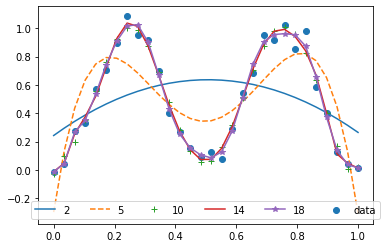

In [5]:
z2 = np.polyfit(x, y, 2, full=True)
plt.plot(x, np.poly1d(z2[0])(x), '-', label='2')
z5 = np.polyfit(x, y, 5, full=True)
plt.plot(x, np.poly1d(z5[0])(x), '--', label='5')
z10 = np.polyfit(x, y, 10, full=True)
plt.plot(x, np.poly1d(z10[0])(x), '+', label='10')
z14 = np.polyfit(x, y, 14, full=True)
plt.plot(x, np.poly1d(z14[0])(x), '-', label='14')
z18 = np.polyfit(x, y, 18, full=True)
plt.plot(x, np.poly1d(z18[0])(x), '-*', label='18')
plt.scatter(x, y, label='data')
plt.legend(loc='lower center', ncol=6)
plt.show()

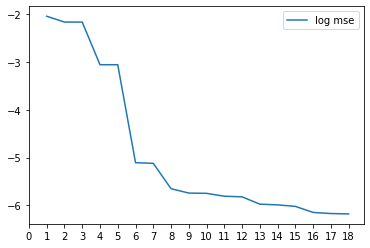

In [6]:
error = [0.0 for _ in range(18)]
zs = []
for i in range(18):
    zs.append(np.polyfit(x, y, i+1, full=True))
    error[i] = np.log((np.sum((np.poly1d(zs[i][0])(x) - y)**2)) / 30)
plt.plot(np.arange(1, 19), error, label='log mse')
plt.xticks(np.arange(0, 19))
plt.legend()
plt.show()

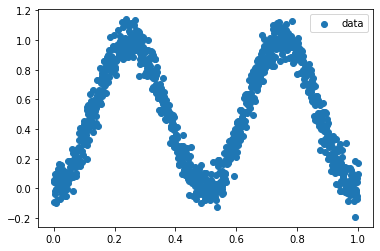

In [7]:
test_x = np.linspace(0, 1, 1000)
test_y = np.sin(test_x * np.pi * 2) ** 2 + np.random.normal(mu, sigma, 1000)

plt.scatter(test_x, test_y, label='data')
plt.legend(loc='best')
plt.show()

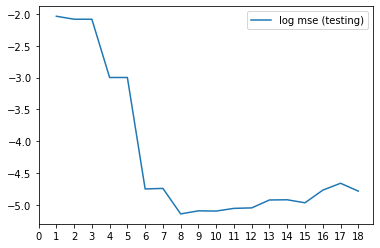

In [8]:
test_error = []
for i in range(18):
    test_error.append(np.log((np.sum((np.poly1d(zs[i][0])(test_x) - test_y)**2)) / 1000))
plt.plot(np.arange(1, 19), test_error, label='log mse (testing)')
plt.xticks(np.arange(0, 19))
plt.legend()
plt.show()

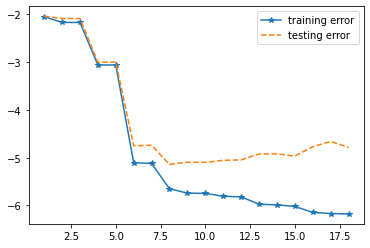

In [9]:
plt.plot(np.arange(1, 19), error, '-*', label='training error')
plt.plot(np.arange(1, 19), test_error, '--', label='testing error')
plt.legend()
plt.show()

# Problem 2

[-23.370456589620055, -60.82771547392575, -108.165522359308]
[-23.29101504794022, -60.66883239056608, -107.92719773426849]


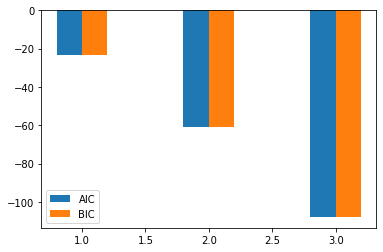

In [12]:
xi = [0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6]
yi = [0.050446, 0.098426, 0.33277, 0.7266, 1.0972, 1.5697, 1.8487, 2.5015]

ps = []
yps = []
errs = []
for i in range(1, 4):
    ps.append(np.polyfit(xi, yi, i, full=True))
    yps.append(np.poly1d(ps[i-1][0])(xi))
    errs.append(np.sum((yi - yps[i-1])**2))

aic = []
bic = []
for i in range(1, 4):
    aic.append(len(xi) * np.log(errs[i-1]/len(xi)) + 2 * i)
    bic.append(len(xi) * np.log(errs[i-1]/len(xi)) + np.log(len(xi)) * i)

plt.bar(np.arange(1, 4)-.1, aic, width=.2, label='AIC')
print(aic)
# plt.show()
plt.bar(np.arange(1, 4)+.1, bic, width=.2, label='BIC')
print(bic)
plt.legend()
plt.show()